In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from skimage.feature import peak_local_max
%matplotlib inline

In [30]:
!dir

 Volume in drive E is SSD volume
 Volume Serial Number is FA50-0540

 Directory of E:\ImportantDocBackup\UOM Assignments\Semester 4\machine_vision\Exercise_6

03/16/2022  02:19 PM    <DIR>          .
03/16/2022  02:19 PM    <DIR>          ..
03/16/2022  01:11 PM    <DIR>          .ipynb_checkpoints
03/16/2022  02:19 PM         2,133,504 190301H_EX06.ipynb
03/16/2022  01:43 PM            41,303 coins.jpg
03/16/2022  01:08 PM           368,443 en2550_excercise_06.pdf
03/16/2022  02:17 PM            13,160 pic1.png
03/16/2022  01:10 PM                12 README.md
03/16/2022  01:43 PM           250,720 sudoku.png
03/16/2022  02:17 PM             1,635 templ.png
               7 File(s)      2,808,777 bytes
               3 Dir(s)  175,671,869,440 bytes free


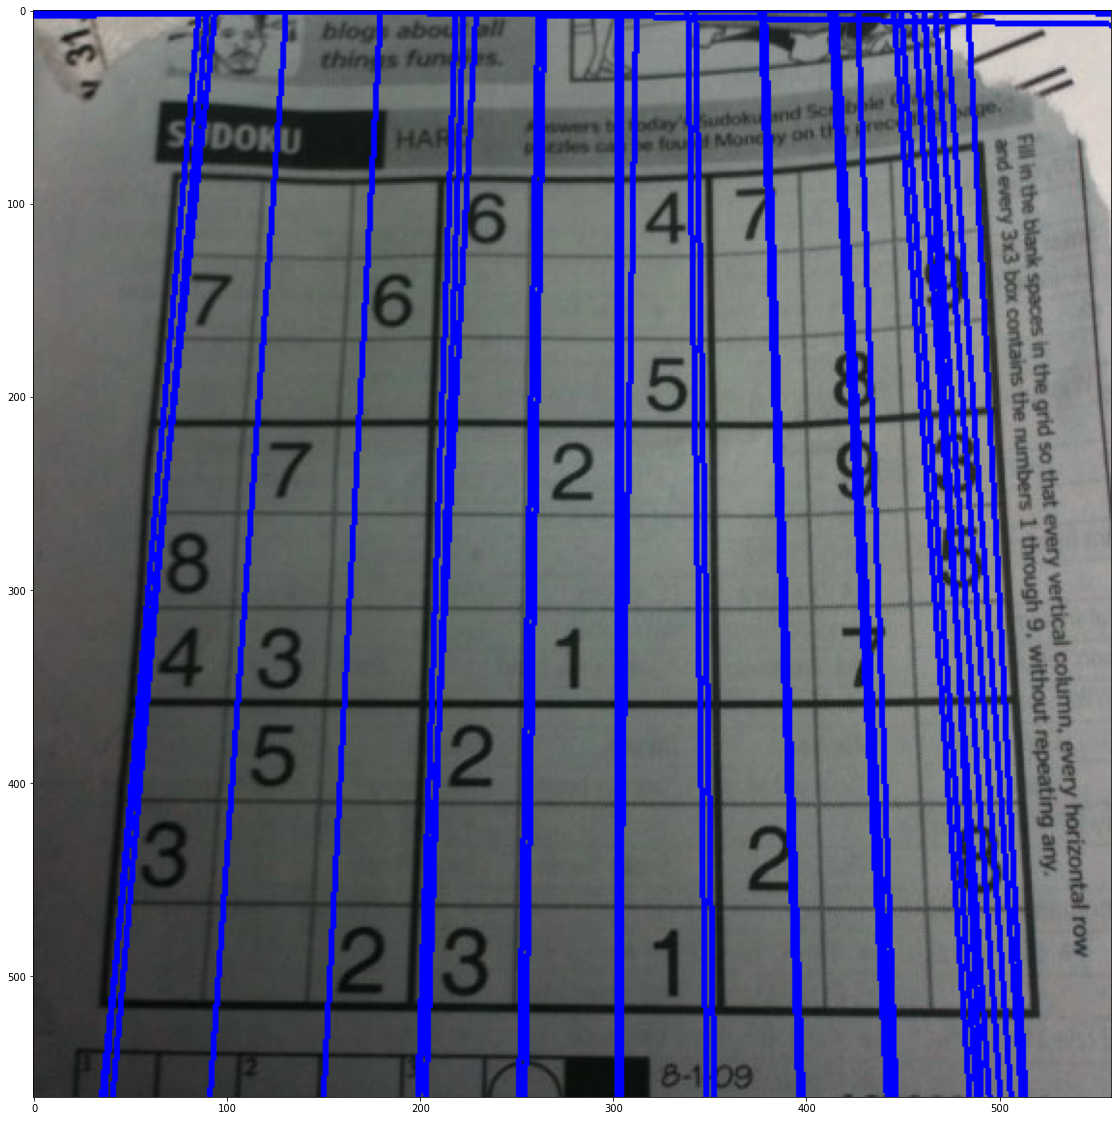

In [13]:
im = cv.imread('sudoku.png', cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
edged = cv.Canny(gray, 20, 150, apertureSize = 3)
lines = cv.HoughLines(edged, 1, np.pi/180, 175)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    
    
    x0, y0 = a * rho, b*rho
    x1, y1 = int(x0 + 1000 * (-b)), int(x0 + 1000 * (a))
    x2, y2 = int(x0 - 1000 * (-b)), int(x0 - 1000 * (a))
    
    
    cv.line(im, (x1,y1), (x2, y2), (0,0,255), 2)
    
fig, ax = plt.subplots(1,figsize=(20,20))
ax.imshow(im, cmap='gray')
plt.show()

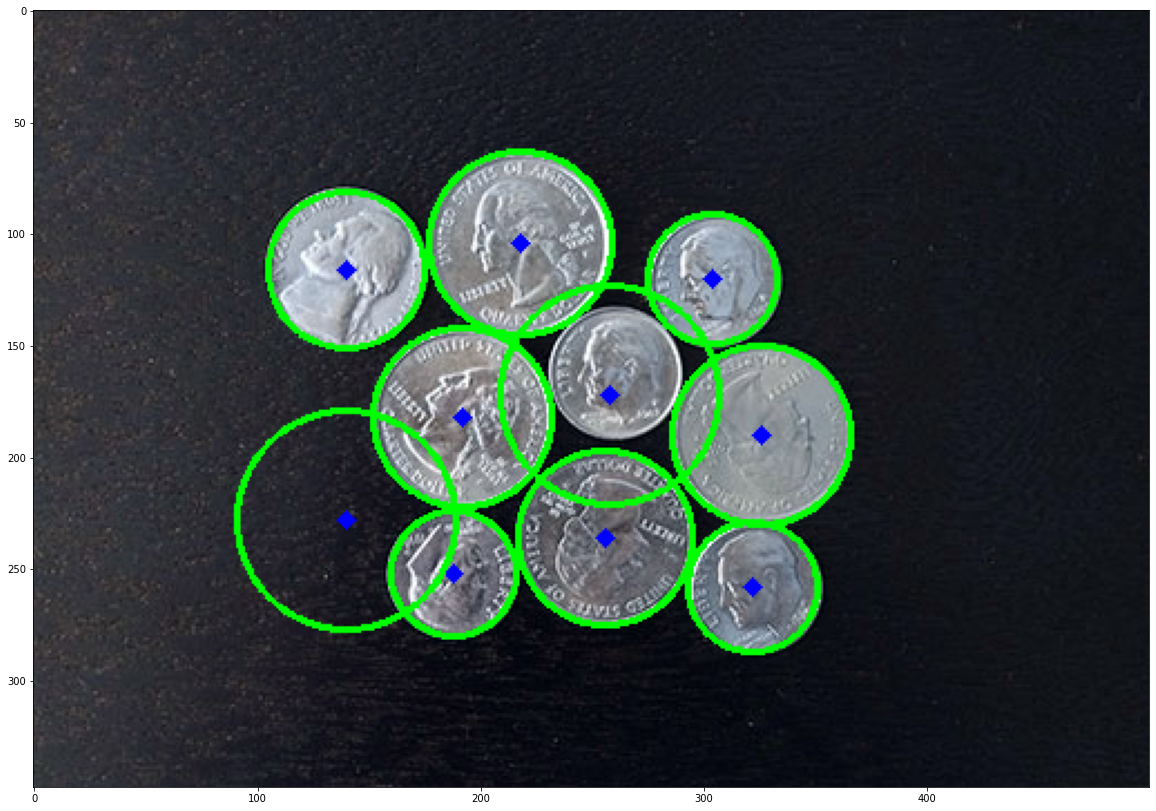

In [27]:
img = cv.imread('coins.jpg', cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,50,param1=150,param2=20,minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(img,(i[0],i[1]),2,(0,0,255),3)


fig, ax = plt.subplots(1,figsize=(20,20))
ax.imshow(img, cmap='gray')
plt.show()

In [37]:
im=cv.imread(r'pic1.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None
templ=cv.imread(r'templ.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert temp is not None

im_edges = cv.Canny(im, 50, 250)
templ_edges = cv.Canny(templ, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)

out = cv.cvtColor(im, cv.COLOR_BAYER_BG2BGR)
for x,y,scale, orientation in positions[0]:
    halfHeight = templ.shape[0] / 2. * scale
    halfWidth = templ.shape[1] / 2. * scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("x = {}, y = {}, scale = {}, oriontation = {}, p1 = {}, p2 = {}".format(x,y,scale, orientation, p1, p2))
    cv.rectangle(out, p1, p2, (0,0,255))

x = 29.0, y = 109.0, scale = 1.0, oriontation = 0.0, p1 = (4, 76), p2 = (54, 141)


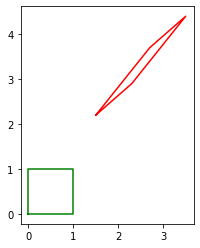

In [46]:
a, b, c, d = [0, 0, 1], [0, 1, 1], [1,1,1], [1,0,1]
X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s = 1
tx, ty = 1.5, 2.2
# H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx], [s*np.sin(theta), s*np.cos(theta), ty], [0,0,1]])
# Y = H @ X

a11, a12, a21, a22 = 0.8, 1.2, 0.7, 1.5 #Should be a non-singular matrix here
A = np.array([[a11,a12,tx], [a21, a22, ty], [0,0,1]])
Y = A @ X

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')
ax.set_aspect('equal')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')
plt.show()

In [50]:
im1 = cv.imread(r'img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread(r'img4.ppm', cv.IMREAD_ANYCOLOR)

# H = np.array(
#     [
#         [6.6378e-01, 6.8003e01, -3.1230e+01],
#         [-1.4495e-01, 9.71283e-01, 1.4877e+02],
#         [4.2519e-04, -1.393e-05, 1]
#     ]
# )

H
im1to4 = cv.warpPerspective(im4, np.linalg.inv(H), (2000, 2000))



error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\imgwarp.cpp:3144: error: (-215:Assertion failed) _src.total() > 0 in function 'cv::warpPerspective'
